**Importing Libraries**

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

**Importing train and test data**

In [8]:
train_data=pd.read_csv('/content/drive/My Drive/train.csv')

In [9]:
test_data=pd.read_csv('/content/drive/My Drive/test.csv')

In [10]:
train_data.head(5)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [11]:
test_data.head(5)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [13]:
train_data.drop('ID',inplace=True,axis=1)
test_data.drop('ID',inplace=True,axis=1)

In [14]:
print(train_data.columns)
print(test_data.columns)

Index(['y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=377)
Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10', 'X11',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=376)


In [15]:
print(train_data.columns)
print(test_data.columns)

Index(['y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=377)
Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10', 'X11',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=376)


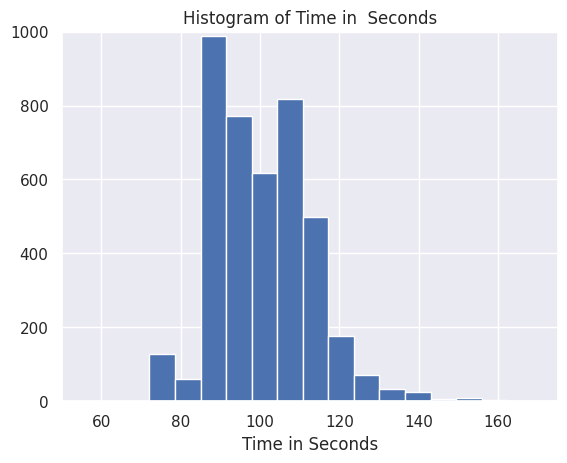

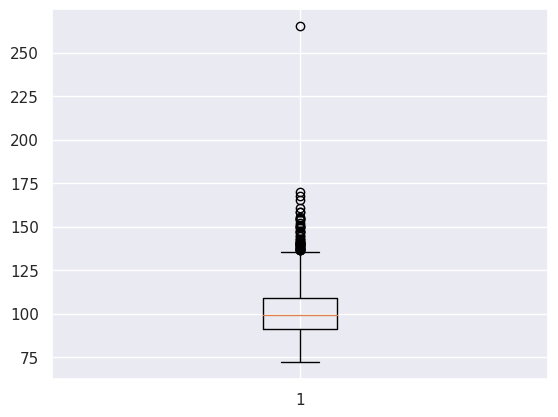

In [44]:
plt.hist(train_data.y, bins = 30)
plt.xlabel('Time in Seconds')
plt.title('Histogram of Time in  Seconds')
plt.grid(True)
plt.axis([50,175, 0,1000])
plt.show()

p = plt.boxplot(train_data.y)
plt.show()

**3. Columns having variance == zero, and remove those variable(s).**


In [17]:
Zero_var_col = train_data.var()[train_data.var()==0].index.values
Zero_var_col

<ipython-input-17-a722f1d355c1>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Zero_var_col = train_data.var()[train_data.var()==0].index.values
<ipython-input-17-a722f1d355c1>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Zero_var_col = train_data.var()[train_data.var()==0].index.values


array(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290',
       'X293', 'X297', 'X330', 'X347'], dtype=object)

In [18]:
# Deleting the lables having var == 0
train_data.drop(Zero_var_col,axis = 1,inplace=True)
test_data.drop(Zero_var_col,axis = 1,inplace=True)

In [19]:
# Cross check
train_data.columns

Index(['y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=365)

**4. Check for null and unique values for test and train sets.**


**checking null values**

In [20]:
np.sum(train_data.isna().sum())

0

In [21]:
np.sum(test_data.isna().sum())

0

**checking unique values**

**Unique value of all the columns are verified as under, it can be observed that except for first 10 columns all other columns have only 0 & 1**



In [22]:
for i in train_data.columns:
    print(train_data[i].unique())

[130.81  88.53  76.26 ...  85.71 108.77  87.48]
['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
['a' 'e' 'c' 'f' 'd' 'b' 'g']
['d' 'b' 'c' 'a']
['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']
['o' 'x' 'e' 'n' 's' 'a' 'h' 'p' 'm' 'k' 'd' 'i' 'v' 'j' 'b' 'q' 'w' 'g'
 'y' 'l' 'f' 'u' 'r' 't' 'c']
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


**4. Apply label encoder on train & test datasets**


In [23]:
# identifying categorical columns
label_columns = train_data.describe(include=['object']).columns.values
label_columns

array(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype=object)

In [24]:
le = LabelEncoder()

for col in label_columns:
    le.fit(train_data[col].append(test_data[col]).values)
    train_data[col]= le.transform(train_data[col])
    test_data[col]= le.transform(test_data[col])

<ipython-input-24-3c71c57f353e>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  le.fit(train_data[col].append(test_data[col]).values)
<ipython-input-24-3c71c57f353e>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  le.fit(train_data[col].append(test_data[col]).values)
<ipython-input-24-3c71c57f353e>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  le.fit(train_data[col].append(test_data[col]).values)
<ipython-input-24-3c71c57f353e>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  le.fit(train_data[col].append(test_data[col]).values)
<ipython-input-24-3c71c57f353e>:4: FutureWarning: The series.append method is deprecated and will be

In [25]:
train_data.columns

Index(['y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=365)

In [26]:
# cross checking if lables are encoded to numbers
train_data['X0'].unique()

array([37, 24, 46, 11, 41, 49, 36, 34, 45, 40, 23, 32, 50, 51,  9, 10, 12,
       52, 43, 18, 15, 48,  6,  0, 31,  8, 30, 16, 29,  1, 26, 17, 35, 44,
       25, 22, 28, 47,  4, 19, 39, 38, 21, 14,  3, 33,  2])

**5. Performing dimentionality reduction**


In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.98,svd_solver='full')

X = train_data.drop('y',axis=1)
y = train_data['y']

In [28]:
X_train , X_val , y_train , y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
pca.fit(X)

PCA(n_components=0.98, svd_solver='full')

In [30]:
pca.n_components_

12

In [31]:
pca.explained_variance_ratio_

array([0.40868988, 0.21758508, 0.13120081, 0.10783522, 0.08165248,
       0.0140934 , 0.00660951, 0.00384659, 0.00260289, 0.00214378,
       0.00209857, 0.00180388])

**6. Predicting using XGBoost**


In [33]:
pca_X_train = pd.DataFrame(pca.transform(X_train))
pca_X_val = pd.DataFrame(pca.transform(X_val))
pca_test = pd.DataFrame(pca.transform(test_data))

In [34]:
# Initialising the model
model = xgb.XGBRegressor(objective='reg:linear',learning_rate=0.1)

In [35]:
#Fitting the model
model.fit(pca_X_train,y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:04:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [36]:
#predict on the validaiton set
pred_y_val = model.predict(pca_X_val)

In [37]:
#capture the MSE to get a measure of how accurate the predictions were
mse_score = mean_squared_error(y_val,pred_y_val)

In [38]:
#print the MSE score
print(mse_score)

83.2131927507934


In [41]:
import math
print("Root Mean Squared Error:")
print(math.sqrt(mse_score))


Root Mean Squared Error:
9.12212654761999
